In [1]:
# Importing all the Libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [2]:
# Entering the URL of the images

bottom_left = input("Add bottom left image link:")
bottom_right = input("Add bottom right image link:")
center = input("Add center image link:")
top_left = input("Add top left image link:")
top_right = input("Add top right image link:")

Add bottom left image link:https://www.w3schools.com/howto/img_snow_wide.jpg
Add bottom right image link:https://filedn.com/ltOdFv1aqz1YIFhf4gTY8D7/ingus-info/BLOGS/Photography-stocks3/stock-photography-slider.jpg
Add center image link:https://therightsofnature.org/wp-content/uploads/2018/01/turkey-3048299_1920-1366x550.jpg
Add top left image link:https://p.bigstockphoto.com/GeFvQkBbSLaMdpKXF1Zv_bigstock-Aerial-View-Of-Blue-Lakes-And--227291596.jpg
Add top right image link:https://www.gettyimages.pt/gi-resources/images/Homepage/Hero/PT/PT_hero_42_153645159.jpg


In [3]:
# Getting data from URLs

BL = urlopen(bottom_left).read()
BR = urlopen(bottom_right).read()
CR = urlopen(center).read()
TL = urlopen(top_left).read()
TR = urlopen(top_right).read()

In [4]:
# Saving all the images locally

l = [BL,BR,CR,TL,TR]
for i,data in enumerate(l):
    with open("Sample{}.jpg".format(i),"wb") as f:
        f.write(data)

In [5]:
# Accessing the RGB matrices of the images

img = []
for i in range(5):
    img.append(cv2.imread("Sample{}.jpg".format(i)))

In [6]:
# Resizing images for the collage

bl = cv2.resize(img[4],(200,200))
br = cv2.resize(img[3],(200,200))
c = cv2.resize(img[2],(100,100))
tl = cv2.resize(img[1],(200,200))
tr = cv2.resize(img[0],(200,200))

In [7]:
# Applying Borders

bottom_left = cv2.copyMakeBorder(bl,5,10,10,5,borderType = cv2.BORDER_CONSTANT)
bottom_right = cv2.copyMakeBorder(br,5,10,5,10,borderType = cv2.BORDER_CONSTANT)
center = cv2.copyMakeBorder(c,10,10,10,10,borderType = cv2.BORDER_CONSTANT)
top_left = cv2.copyMakeBorder(tl,10,5,10,5,borderType = cv2.BORDER_CONSTANT)
top_right = cv2.copyMakeBorder(tr,10,5,5,10,borderType = cv2.BORDER_CONSTANT)

In [8]:
# Making Collage using Horizontal and Vertical Stacking

top = np.hstack([top_left,top_right])
bottom = np.hstack([bottom_left,bottom_right])
merge = np.vstack([top,bottom])
merge[155:275,155:275,:] = center

Collage is Ready !


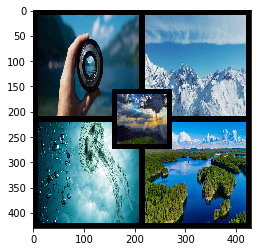

In [9]:
# Finishing Touches

image = cv2.cvtColor(merge,cv2.COLOR_BGR2RGB)
plt.imshow(image)
cv2.imwrite("Final_Image.jpg",merge)
print("Collage is Ready !")